### Librerías necesarias y lectura de datos

In [2]:
#Librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
#Cargamos datos
df_hurtos = pd.read_csv('Datos\hurto_a_persona.csv', sep=';', encoding='utf-8', dtype='unicode')
regions_df = gpd.read_file('Datos\Shapefiles\BarriosMed\BarriosVeredasMed.shp')

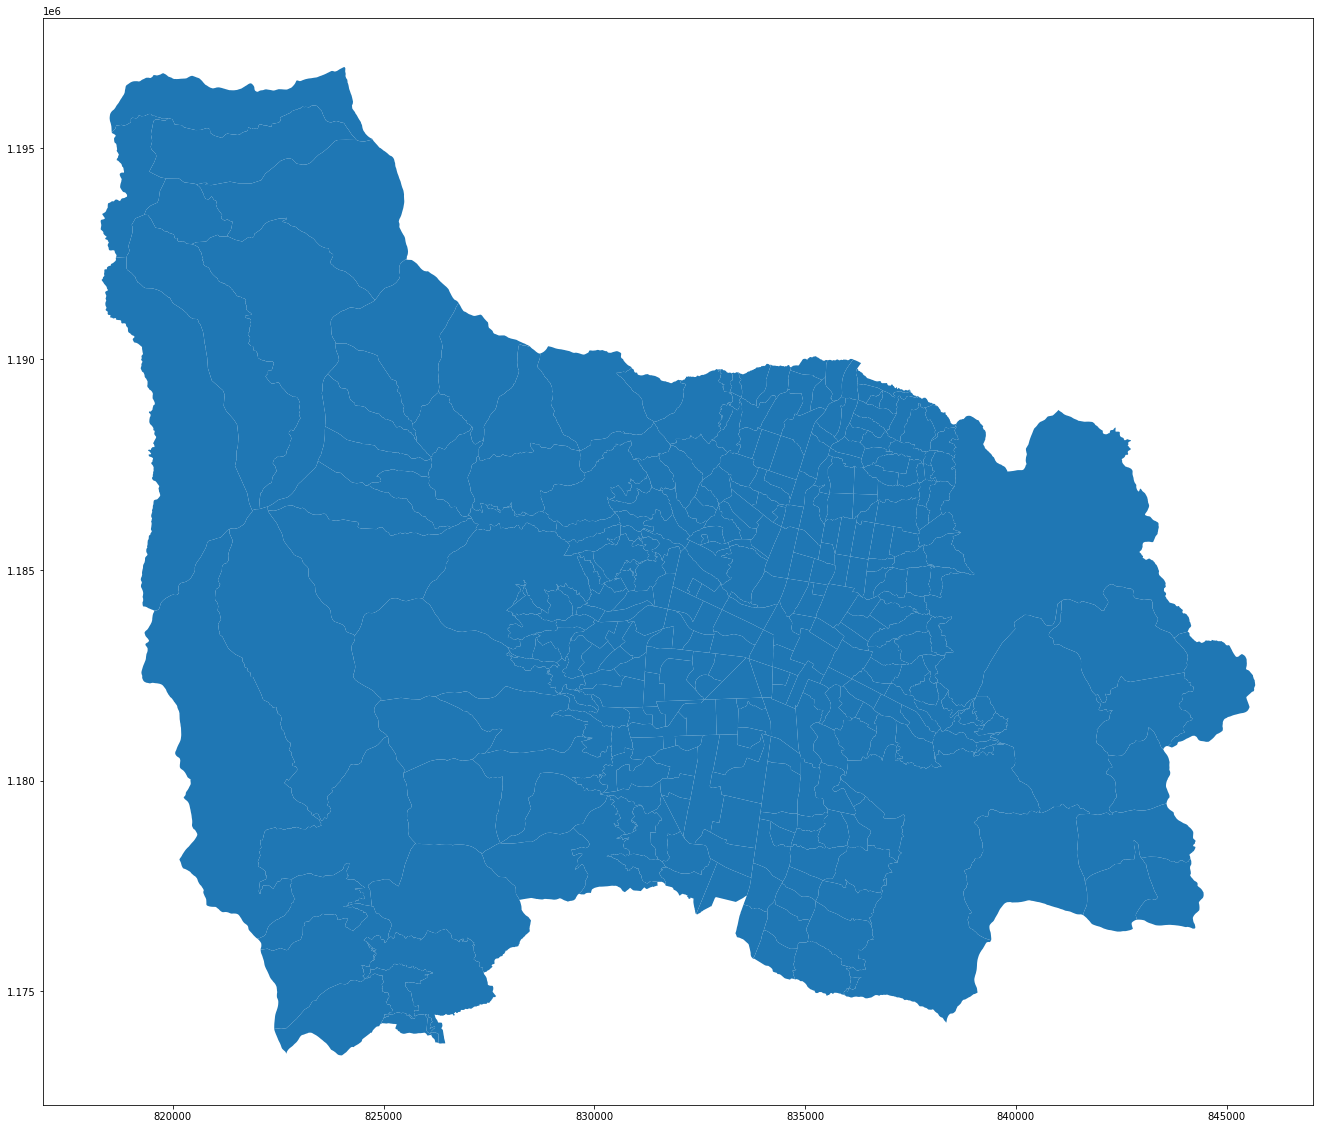

In [4]:
#Grafiquemos el mapa proporcionado por los datos de GeoMedellín
regions_df.plot(figsize=(40,20))
plt.show()

### Exploramos datos

In [5]:
#Eliminar columnas que no se usan de acuerdo a tesis victor
columnas_sin_informacion = ['grupo_actor','actividad_delictiva','parentesco','ocupacion','discapacidad','grupo_especial','nivel_academico','testigo','caracterizacion','articulo_penal','categoria_penal','permiso','unidad_medida']
df_hurtos.drop(columnas_sin_informacion, axis=1, inplace=True)

In [6]:
df_hurtos['nombre_barrio'].unique()
print('Cantidad de barrios en datos de MEData: ', len(df_hurtos['nombre_barrio'].unique()))

Cantidad de barrios en datos de MEData:  332


In [7]:
#Pongamos en minuscula las columnas de nombre de barrio de ambos conjuntos de datos y agregemo una columna con la cantidad de hurto
df_hurtos['count'] = 1
datos_por_barrio = df_hurtos.groupby(['nombre_barrio']).count()[['count']].reset_index()
datos_por_barrio['nombre_barrio'] = datos_por_barrio['nombre_barrio'].str.lower()
regions_df['NOMBRE'] = regions_df['NOMBRE'].str.lower()
datos_por_barrio.sort_values(by=['count'], ascending=False).head(5)

,nombre_barrio,count
136,la candelaria,29513
93,el poblado,6168
21,barrio colón,5803
123,guayaquil,5552
255,san benito,4694


In [8]:
#Merge por datos_por_barrio['nombre_barrio'] y regions_df['NOMBRE']
#ESTO NO ES LA MEJOR MANERA DE HACERLO, FALTA HACER UN FILTRO PARA CAMBIAR NOMBRES DE BARRIOS.
#TAMBIÉN OTRA POSIBILIDAD SEA IMPLEMENTAR UNA MANERA MÁS ADECUADA PARA EL MERGE, COMO CON LAS VARIABLES DE LATITUD Y LONGITUD.
#ESTO ES SOLO UN EJEMPLO PARA LA VISUALIZACIÓN Y MANEJO DE LIBRERÍA GEOPANDAS
full_df = pd.merge(right=datos_por_barrio, left=regions_df, how='inner', left_on='NOMBRE', right_on='nombre_barrio')

In [9]:
#Creamos dataframe para graficar
full_df = full_df[['nombre_barrio', 'X_Cord', 'Y_Cord', 'geometry','count']]

<AxesSubplot:title={'center':'Mapa de calor'}>

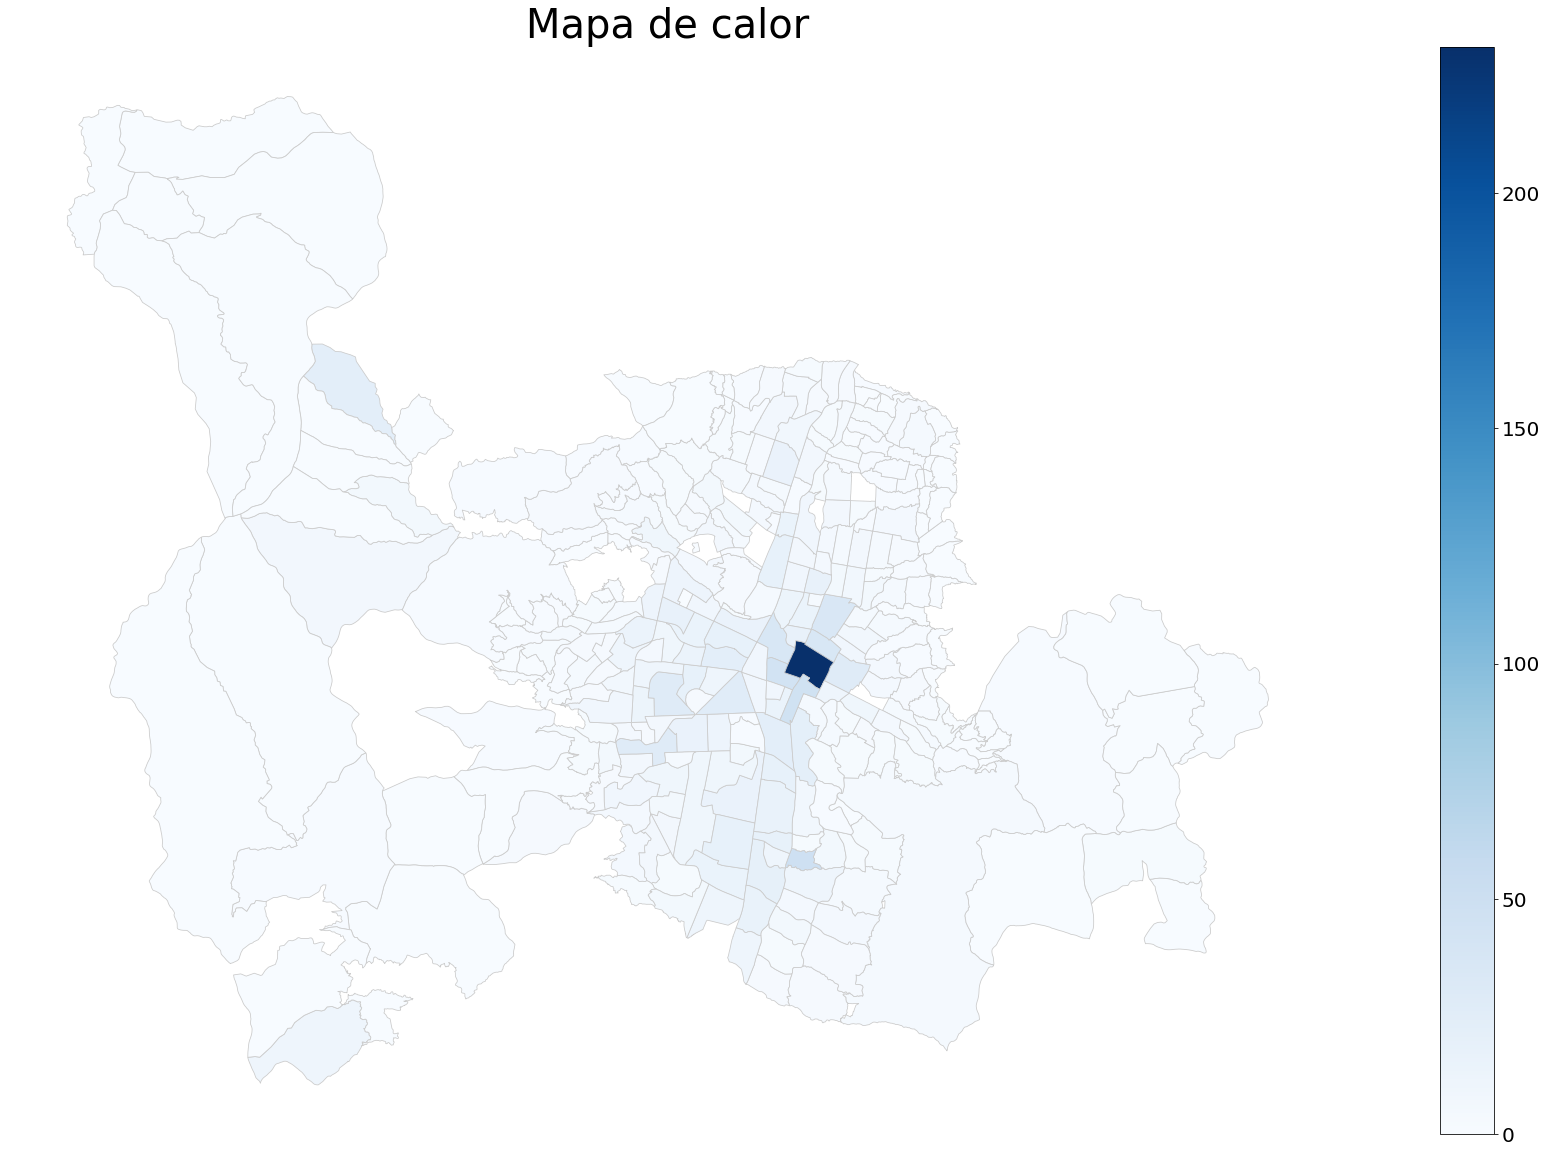

In [10]:
#Graficamos
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Mapa de calor', fontdict={'fontsize': '40', 'fontweight' : '3'})
color = 'Blues'
vmin, vmax = 0, 231
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
full_df.plot('count', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))